In [1]:
%matplotlib inline
import pylab as pl

In [2]:
import pyspeckit
from astropy import units as u
import numpy as np

In [3]:
source_size =  4.3350376922e+00
tkin = 250
Ntot = 1.0061155735e+14
vwidth_fwhm = 4.2101396644e+00
vwidth = vwidth_fwhm / np.sqrt(8*np.log(2))
vcen = 0.0000000000e+00
tbg = 0
FreqMin = 100*u.GHz
FreqMax = 300*u.GHz

In [4]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, get_molecular_parameters, generate_model, generate_fitter

In [5]:
freqs, aij, deg, EU, partfunc = get_molecular_parameters('H2O',
                                                         catalog='JPL',
                                                         fmin=FreqMin,
                                                         fmax=FreqMax)
def modfunc(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
    return model


fitter = generate_fitter(modfunc, name="H2O")

In [6]:
tkin = 100
xarr = np.linspace(230*u.GHz, 235*u.GHz, 10000)
model = pyspeckit.Spectrum(xarr=xarr, data=modfunc(xarr, vcen, vwidth, tkin, Ntot, ))

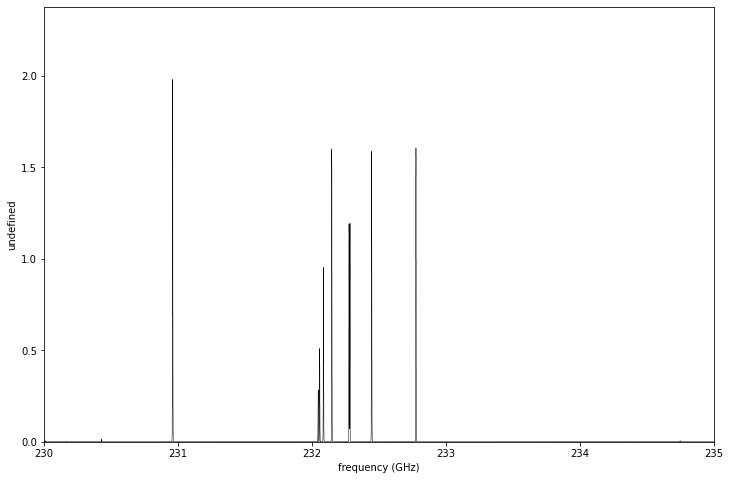

In [7]:
fig = pl.figure(figsize=(12,8))

model.plotter(figure=fig)